In [77]:
from distmesh import * 
import numpy as np
import matplotlib.pyplot as plt

count =  200 displacement =  0.01341338774304038
count =  400 displacement =  0.0021440126955764023


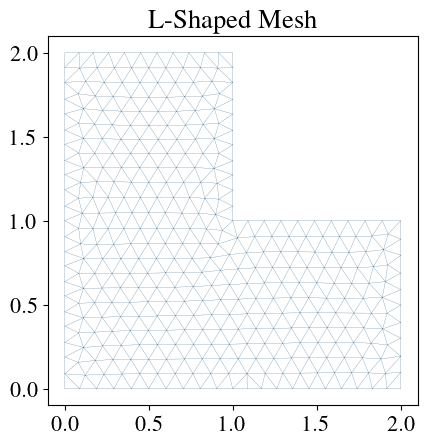

In [78]:
# L-shape 

pfix_L = np.array([[0,0], [0,1], [0,2], [1,2], [1,1], [2,1], [2,0], [1,0]])
bbox_L = np.array([0, 2, 0, 2])

def fd_L(p): 
    return ddiff(drectangle(p, 0, 2, 0, 2), drectangle(p, 1, 2, 1, 2))
pts, tri = distmesh2D(fd_L, huniform, 0.1, bbox_L, pfix_L)

plt.rcParams.update({
        "font.family": "Times", 
        "text.usetex": True,
        "font.size": 16
    })
pts,tri = fixmesh(pts,tri)
plt.triplot(pts[:,0],pts[:,1],tri,linewidth=0.05,color='black')
plt.title('L-Shaped Mesh')
axes=plt.gca()
axes.set_aspect(1)


count =  200 displacement =  0.028897470142121722
count =  400 displacement =  0.02794214063670316
count =  600 displacement =  0.018671631549725523
count =  800 displacement =  0.029062119656740854
count =  1000 displacement =  0.015501113741939028
count =  1200 displacement =  0.02247175377300542
count =  1400 displacement =  0.02177862675933685
count =  1600 displacement =  0.027734285163831616
count =  1800 displacement =  0.02041554705741861
count =  2000 displacement =  0.02126907568510168
count =  2200 displacement =  0.022366571921485036
count =  2400 displacement =  0.036525863539242504
count =  2600 displacement =  0.02903657647025946
count =  2800 displacement =  0.015554595148918384
count =  3000 displacement =  0.022501777452810238
count =  3200 displacement =  0.021789766606649448
count =  3400 displacement =  0.027745885813027296
count =  3600 displacement =  0.02041891829039907
count =  3800 displacement =  0.021270699096794705
count =  4000 displacement =  0.0223673967

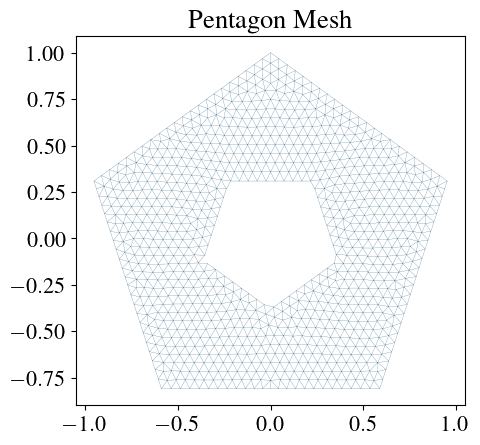

In [79]:
pi = np.pi
c1, c2, s1, s2 = np.cos(2*pi/5), np.cos(pi/5), np.sin(2*pi/5), np.sin(4*pi/5)
mdpts = np.array([[(-s1-s2)/2, (c1-c2)/2], [-s1/2, (1+c1)/2], [s1/2, (1+c1)/2], [(s1+s2)/2, (c1-c2)/2], [0, (-c2-c2)/2]])
vrts = np.array([[-s2,-c2], [s2,-c2], [s1,c1], [-s1, c1], [0,1]])
pfix_pent = np.concatenate((mdpts, vrts), axis=0)
bbox_pent = np.array([-1,1, -1, 1]) 



def dline(p,x1,y1,x2,y2):
    nx = y1-y2
    ny = x2-x1
    nn = np.sqrt(nx*nx+ny*ny)
    # return (p-(x1,x2))*n/||n||
    return -((p[:,0]-x1)*nx+(p[:,1]-y1)*ny)/nn

def dtri(p,p1,p2,p3):
    x1, y1 = p1[0], p1[1]
    x2, y2 = p2[0], p2[1]
    x3, y3 = p3[0], p3[1]
    return np.maximum(dline(p,x1,y1,x2,y2),np.maximum(dline(p,x2,y2,x3,y3),dline(p,x3,y3,x1,y1)))


def fd_pent(p):

    d1 = dtri(p, [s2, -c2], [-s1, c1], [-s2,-c2])
    d2 = dtri(p, [-s2, -c2], [0,1], [-s1, c1])
    d3 = dtri(p, [-s1,c1], [s1, c1], [0,1])
    d4 = dtri(p, [0,1], [s2,-c2], [s1,c1])
    d5 = dtri(p, [s1, c1], [-s2, -c2], [s2,-c2])

    return dunion(dunion(dunion(dunion(d1,d2),d3),d4),d5)

pts, tri = distmesh2D(fd_pent, huniform, 0.05, bbox_pent, pfix_pent)

pts,tri = fixmesh(pts,tri)
plt.triplot(pts[:,0],pts[:,1],tri,linewidth=0.05,color='black')
plt.title('Pentagon Mesh')
axes=plt.gca()
axes.set_aspect(1)


count =  200 displacement =  0.00807583144359092
count =  400 displacement =  0.0031884346770474797


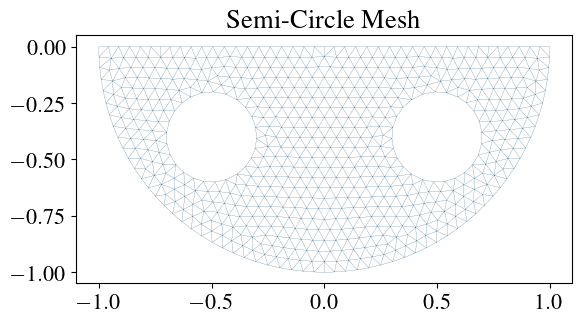

In [80]:
bbox_circ = np.array([-1, 1, -1, 1])
r = 1
pfix_circ = np.array([[0, 0], [-1, 0], [0,-1], [1, 0]])

def fd_circ(p):
    lCirc = dcircle(p, -0.5, -0.4, 0.2)
    rCirc = dcircle(p, 0.5, -0.4, 0.2)
    semiCirc = dintersect(drectangle(p, -1, 1, -1, 0), dcircle(p, 0, 0, 1))
    return ddiff(ddiff(semiCirc, lCirc), rCirc)

pts, tri = distmesh2D(fd_circ, huniform, 0.05, bbox_circ, pfix_circ)

pts,tri = fixmesh(pts,tri)
plt.triplot(pts[:,0],pts[:,1],tri,linewidth=0.05,color='black')
plt.title('Semi-Circle Mesh')
axes=plt.gca()
axes.set_aspect(1)